In [0]:
#Imports
import pandas as pd
import math
import numpy as np


In [2]:
from google.colab import files
uploaded = files.upload()

Saving RECON_star_data.csv to RECON_star_data.csv


In [0]:
#Load Data
recon = pd.read_csv("RECON_star_data.csv")

jt_star = recon[['ID','LHS','RA_hr','RA_min','RA_sec','DEC_degrees','DEC_min','DEC_sec',
                 'ProperMo_arcsec_year','ProperMo_direction_degree','trig_par','mass_est']].copy()

def RA(hrs, min, sec):
    return hrs*15+min*0.25+sec*0.004166

jt_star['A'] = np.vectorize(RA)(jt_star['RA_hr'], jt_star['RA_min'], jt_star['RA_sec'])


def declination(degree, min, sec):
    if degree < 0:
        SIGN = -1
    else:
        SIGN = +1
    return (abs(degree) + (min/60) + (sec/3600))*SIGN

declination(-15, 56, 14.89)
declination(51, 43, 8.62)

jt_star['B'] = np.vectorize(declination)(jt_star['DEC_degrees'], jt_star['DEC_min'], jt_star['DEC_sec'])

def parsec(arcseconds):
    return 1/arcseconds

# check Alpha centauri
parsec(0.76813)

jt_star['C_parsec'] = jt_star.trig_par.apply(parsec)

def lightyears(parsec):
    return parsec*3.26

jt_star['C_lightyears'] = jt_star.C_parsec.apply(lightyears)

def cartesianX(A,B,C):
    return (C * math.cos(B)) * math.cos(A)

jt_star['X'] = np.vectorize(cartesianX)(jt_star['A'], jt_star['B'], jt_star['C_lightyears'])

def cartesianY(A,B,C):
    return (C * math.cos(B)) * math.sin(A)

jt_star['Y'] = np.vectorize(cartesianY)(jt_star['A'], jt_star['B'], jt_star['C_lightyears'])

def cartesianZ(B,C):
    return C * math.sin(B)

jt_star['Z'] = np.vectorize(cartesianZ)(jt_star['B'], jt_star['C_lightyears'])

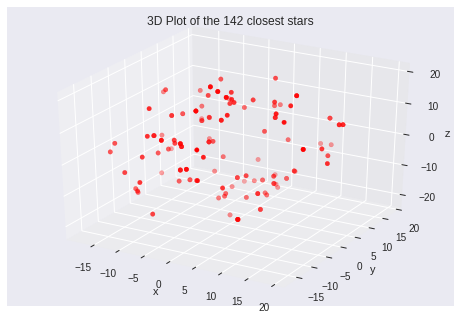

In [5]:
from mpl_toolkits import mplot3d

#matplotlib inline
import matplotlib.pyplot as plt


z = jt_star['Z']
x = jt_star['X']
y = jt_star['Y']


fig_3d = plt.figure()
spac3d = fig_3d.add_subplot(1,1,1, projection='3d')
spac3d.scatter(x,y,z, color='r', marker='o')
spac3d.set_xlabel('x')
spac3d.set_zlabel('z')
spac3d.set_ylabel('y')
plt.title("3D Plot of the 142 closest stars")
plt.show()